# Problem Statement :
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.
There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Our Goals of the Case Study:

To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
To adjust to if the company's requirement changes in the future so you will need to handle these as well.
The steps are broadly:

**Read and understand the data
**Clean the data
**Prepare the data for Model Building
**Model Building
**Model Evaluation
**Making Predictions on the Test Set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [2]:
Lead=pd.read_csv('C:\\Users\\DELL\\Desktop\\Leads.csv')

In [3]:
Lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
Lead.shape

(9240, 37)

In [5]:
Lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
Lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Cleaning

In [7]:
Lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Droping all the columns in which greater than 
for c in Lead.columns:
    if Lead[c].isnull().sum()>3000:
        Lead.drop(c, axis=1,inplace=True)

In [9]:
Lead.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [10]:
#checking value counts of "City" column
Lead['City'].value_counts(dropna=False)

City
Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [11]:
#checking value counts of "Country" column
Lead['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

Mumbai has highest numbers of leads

As you might be able to interpret, the variable City won't be of any use in our analysis. So it's best that we drop it.

In [12]:
# dropping the "City" feature
Lead.drop(['City'], axis = 1, inplace = True)

In [13]:
# Let's now check the percentage of missing values in each column
# leads.isnull().sum() # it gives the number of missing values in each column eg: 20
# len(leads.index) # number of rows in the dataframe # eg: 100

# Calculate the percentage of missing values in each column
round(100*(Lead.isnull().sum()/len(Lead.index)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Update me on Supply Chain Content                 0.00
X Education Forums                                0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper 

In [14]:
Lead.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Update me on Supply Chain Content                   0
X Education Forums                                  0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                   

In [15]:
# Get the value counts of all the columns
# Select all the columns which have 'category' datatype

for column in Lead.columns:
    print(Lead[column].astype('category').value_counts())
    print("__________________________________________________")

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
__________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
__________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
__

# Visualizing the features with Select values

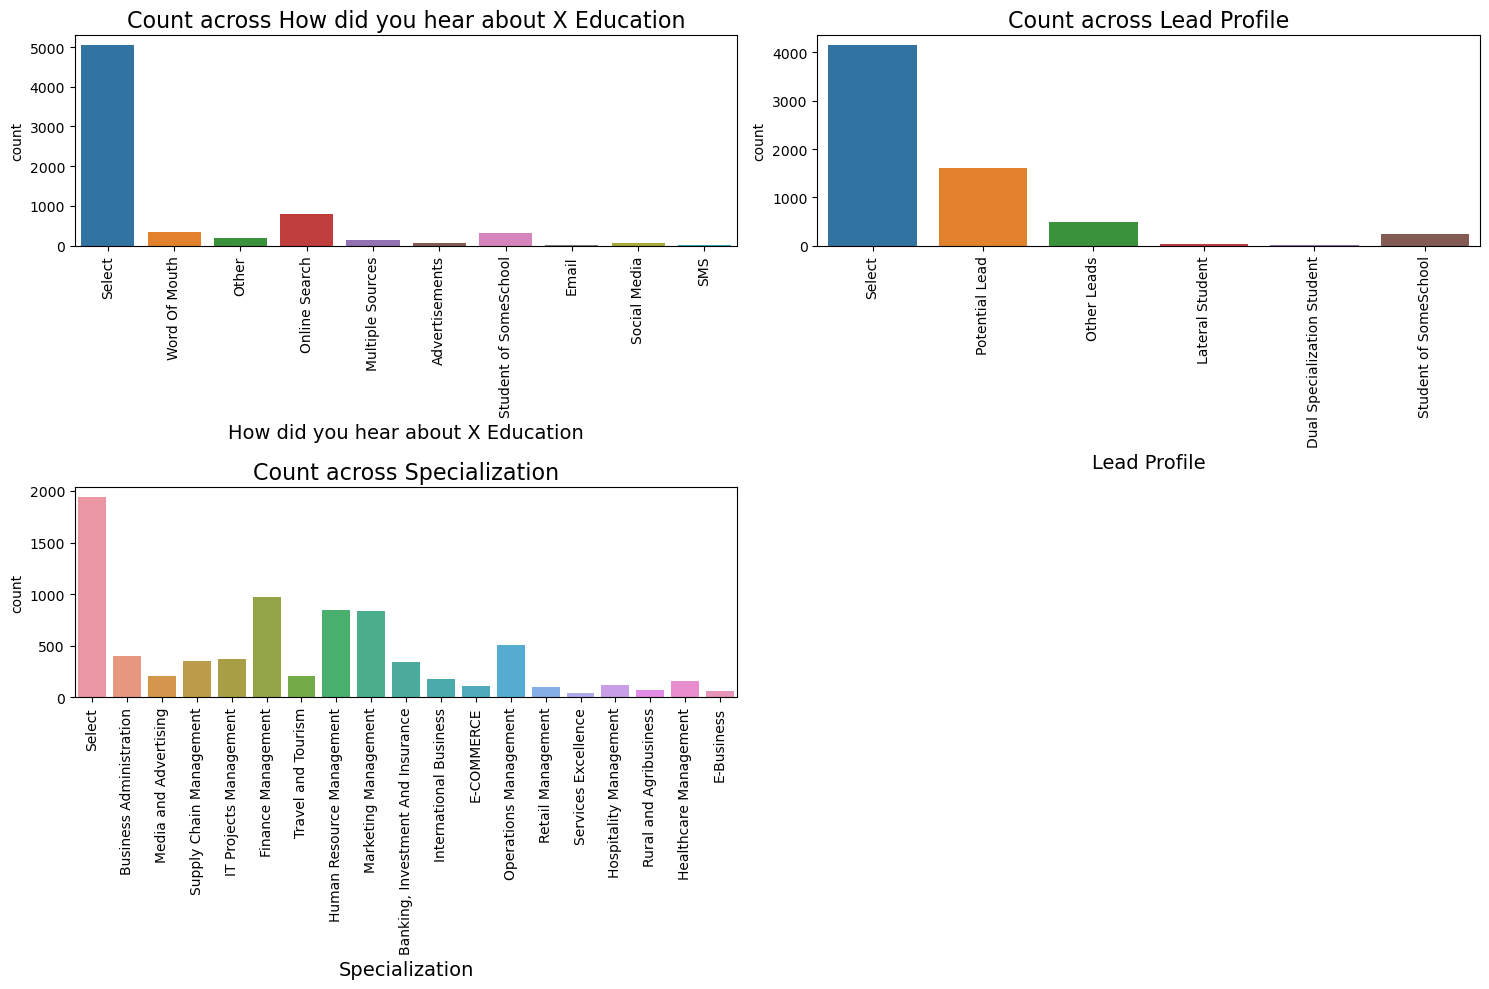

In [16]:
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(data=Lead, x=x)  # Specify the data explicitly
    plt.title('Count across ' + x, size = 16)
    plt.xlabel(x, size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education', 1)
countplot('Lead Profile', 2)
countplot('Specialization', 3)


plt.tight_layout()

In [17]:
# apply v_c() on Lead Profile col
Lead['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [18]:
Lead['Lead Profile'].astype('category').value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [19]:
Lead['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [20]:
Lead['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

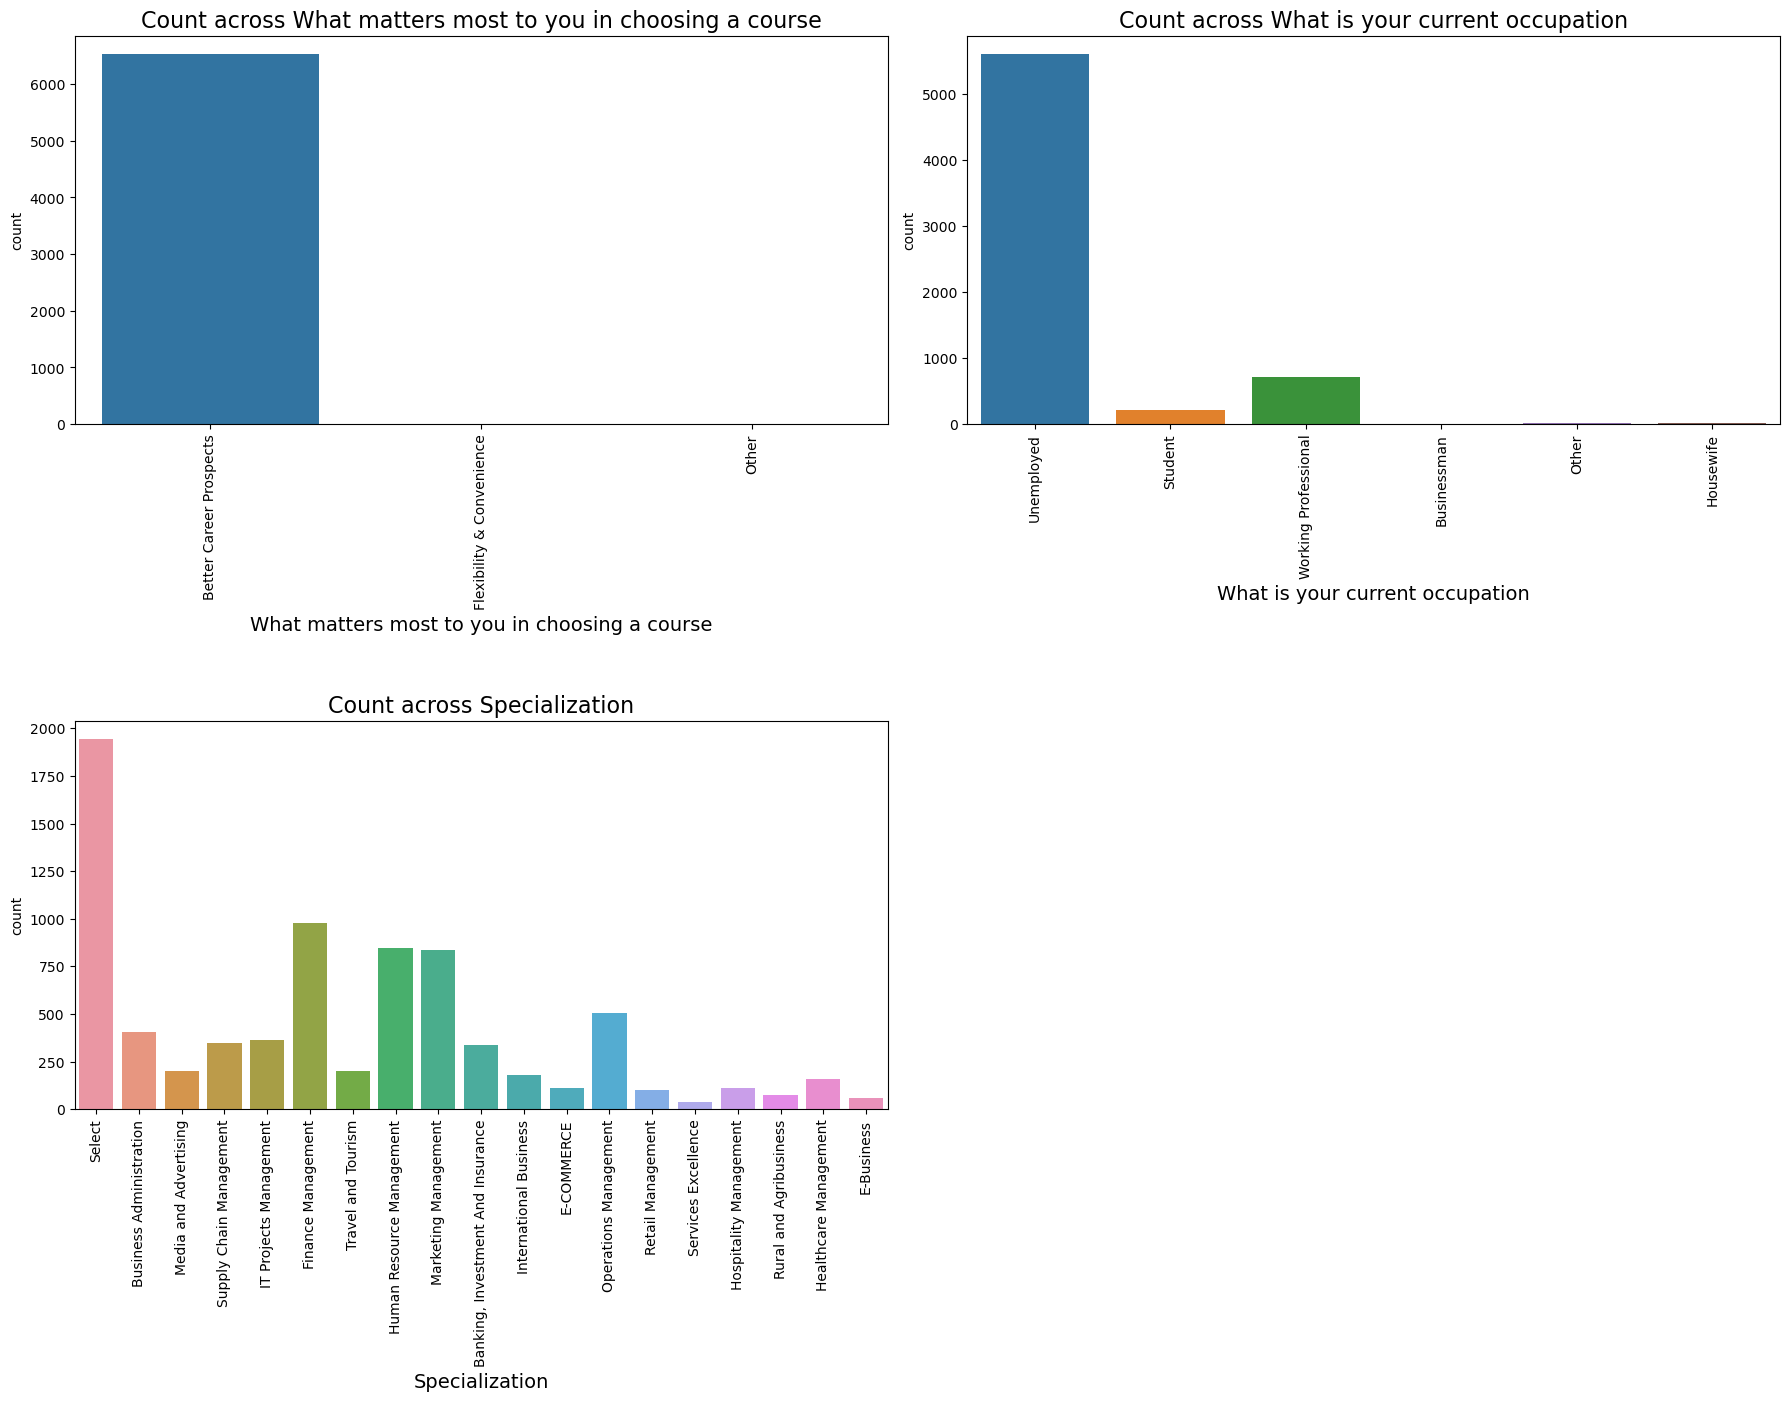

In [21]:
def countplot(x, fig):
    plt.subplot(4, 2, fig)
    sns.countplot(data=Lead, x=x)  # Specify the DataFrame and column name explicitly
    plt.title('Count across ' + x, size=16)
    plt.xlabel(x, size=14)
    plt.xticks(rotation=90)

plt.figure(figsize=(18, 25))

countplot('What matters most to you in choosing a course', 1)
countplot('What is your current occupation', 2)
countplot('Specialization', 3)

plt.tight_layout()


As it can be seen that the levels of "Lead Profile" and "How did you hear about X Education" have a lot of rows which have the value Select which is of no use to the analysis

So it's best that we drop them.

In [22]:
# dropping Lead Profile and How did you hear about X Education cols
Lead.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

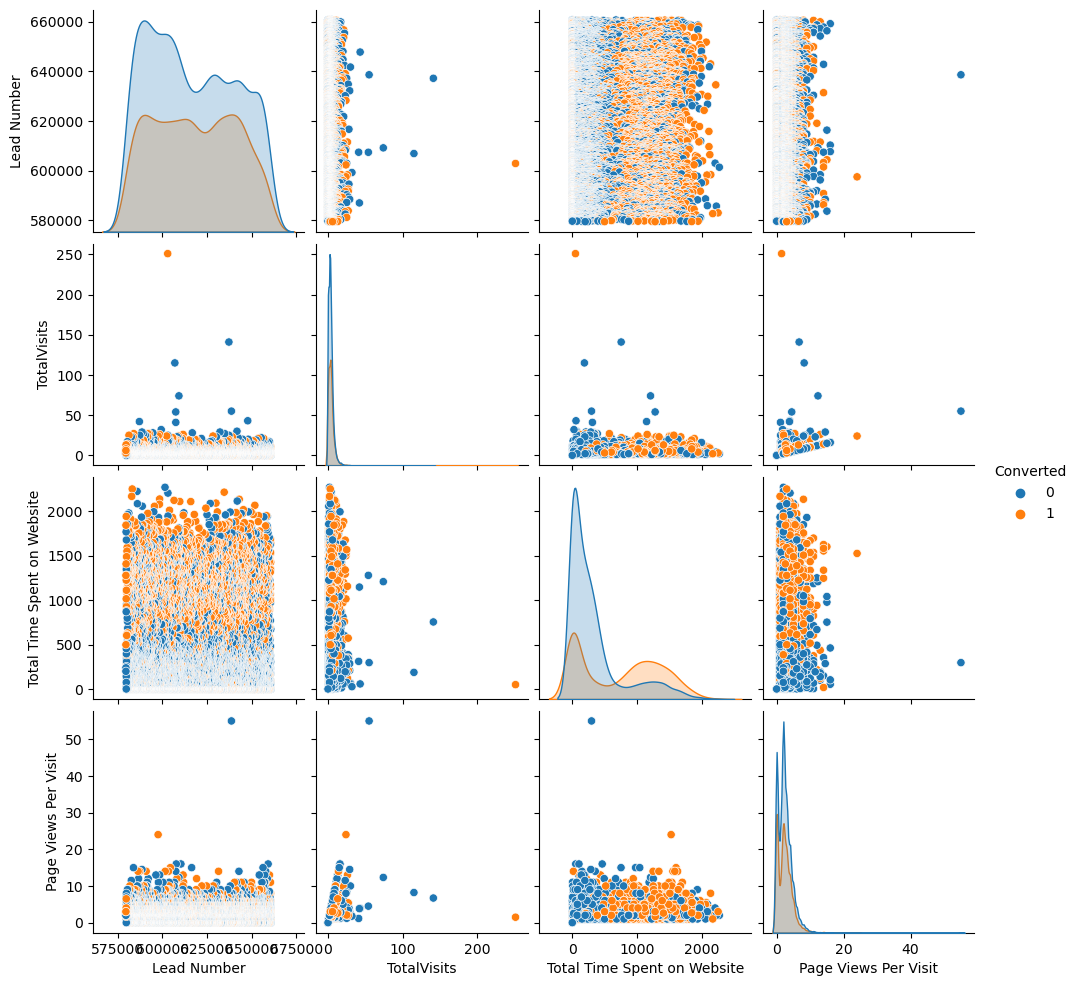

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(Lead,diag_kind='kde',hue='Converted')
plt.show()

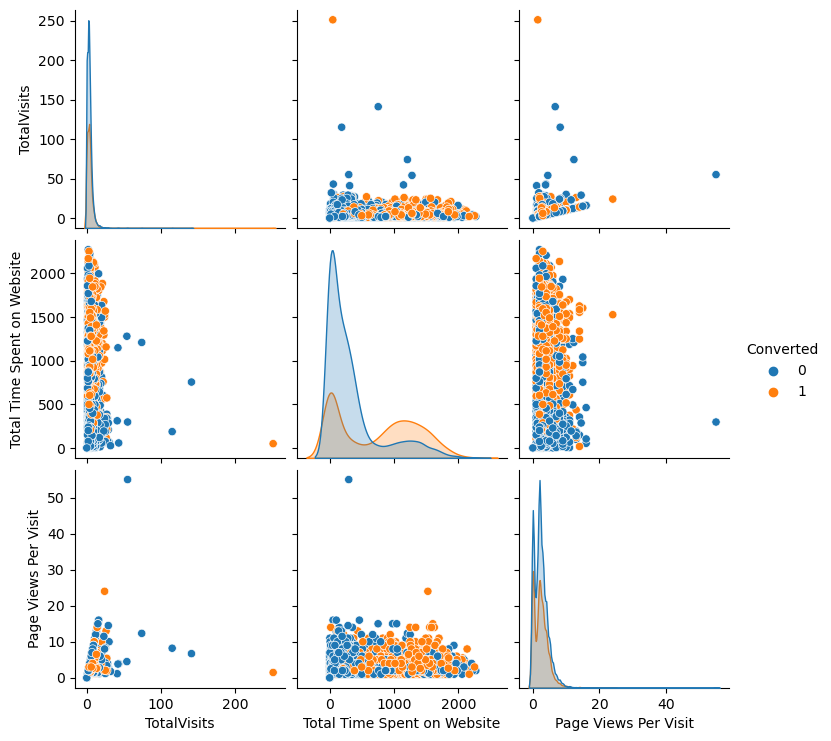

In [24]:
x_edu = Lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x_edu,diag_kind='kde',hue='Converted')
plt.show()

In [25]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedx_edu = pd.DataFrame(pt.fit_transform(x_edu))
transformedx_edu.columns = x_edu.columns
transformedx_edu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.457907,-1.473767,-1.454706,-0.791863
1,0.747918,0.729628,0.308534,-0.791863
2,-0.141636,1.306093,0.065574,1.262845
3,-0.640428,0.264936,-0.536967,-0.791863
4,-0.141636,1.252499,-0.536967,1.262845


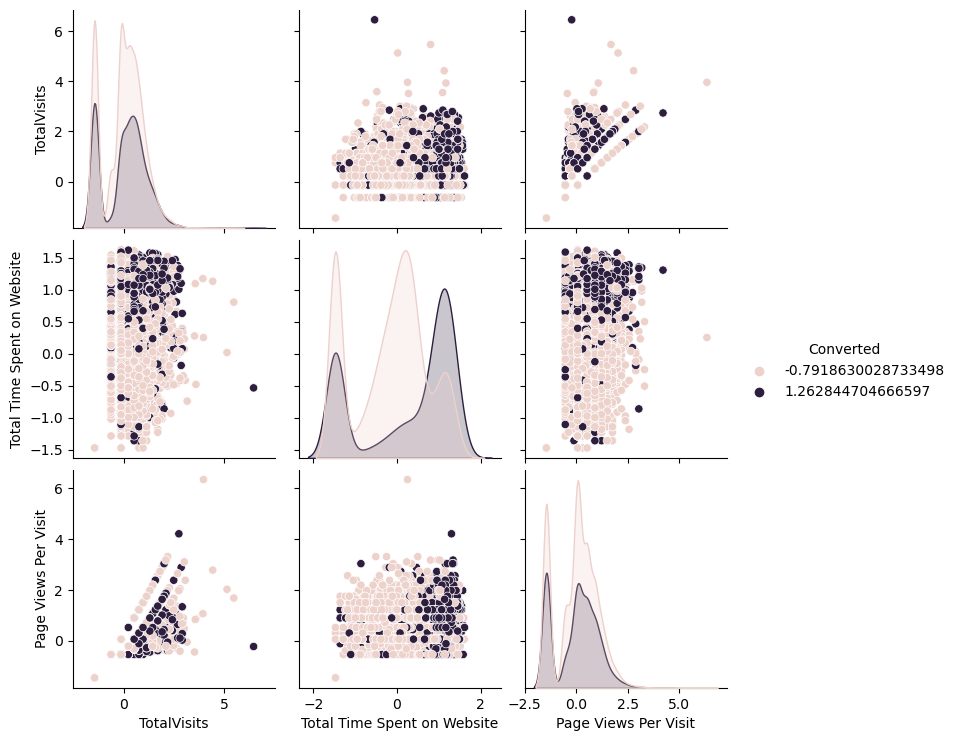

In [26]:
sns.pairplot(transformedx_edu,diag_kind='kde',hue='Converted')
plt.show()

In [27]:
Lead.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [28]:
Lead['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [29]:
Lead.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [30]:
# Checking the number of null values again
Lead.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Country                                   2461
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [31]:
# Dropping the null values rows in the column 'What is your current occupation'

Lead = Lead[~pd.isnull(Lead['What is your current occupation'])]

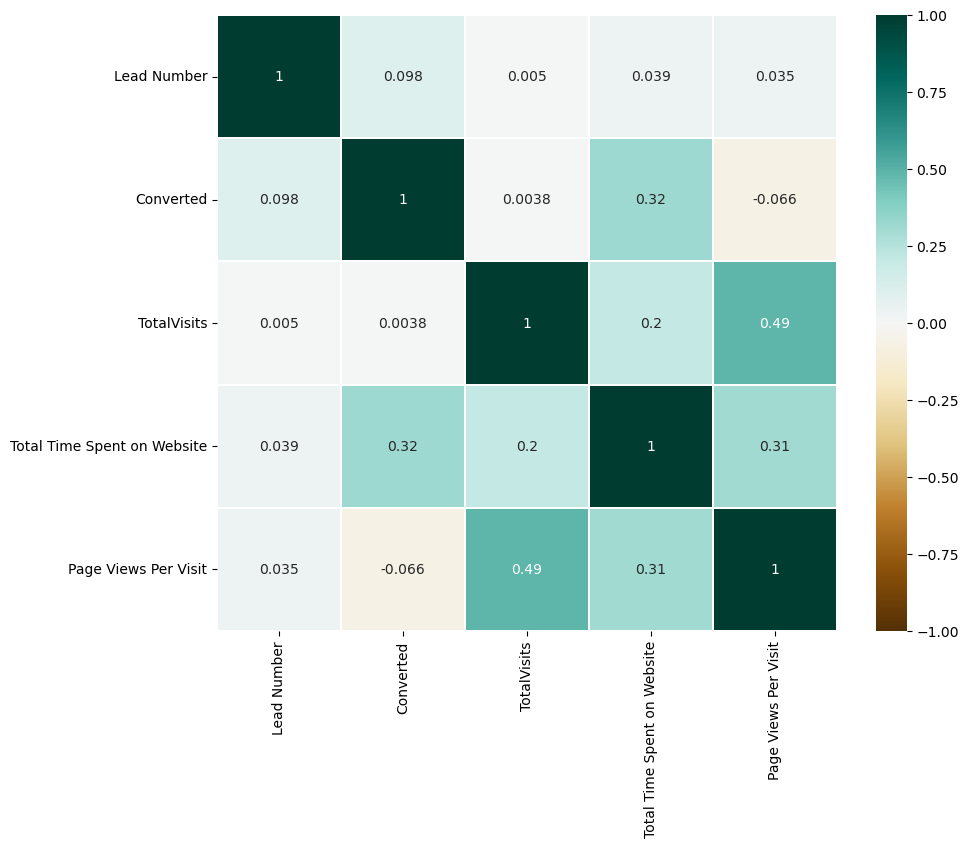

In [32]:
# Observing Correlation
# figure size
# Select only numerical columns
numerical_data = Lead.select_dtypes(include=[np.number])

# figure size
plt.figure(figsize=(10, 8))

# heatmap
sns.heatmap(numerical_data.corr(), annot=True, cmap="BrBG", robust=True, linewidth=0.1, vmin=-1)
plt.show()


# Analysing Categorical features

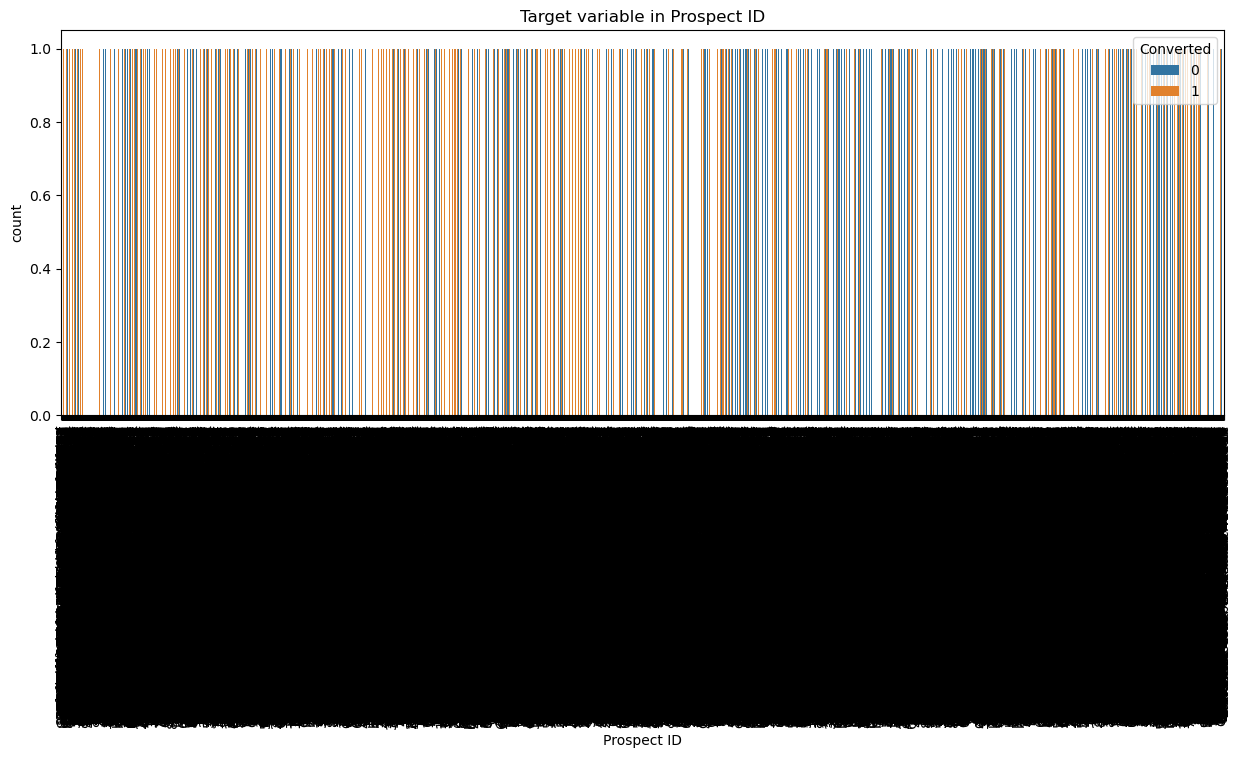

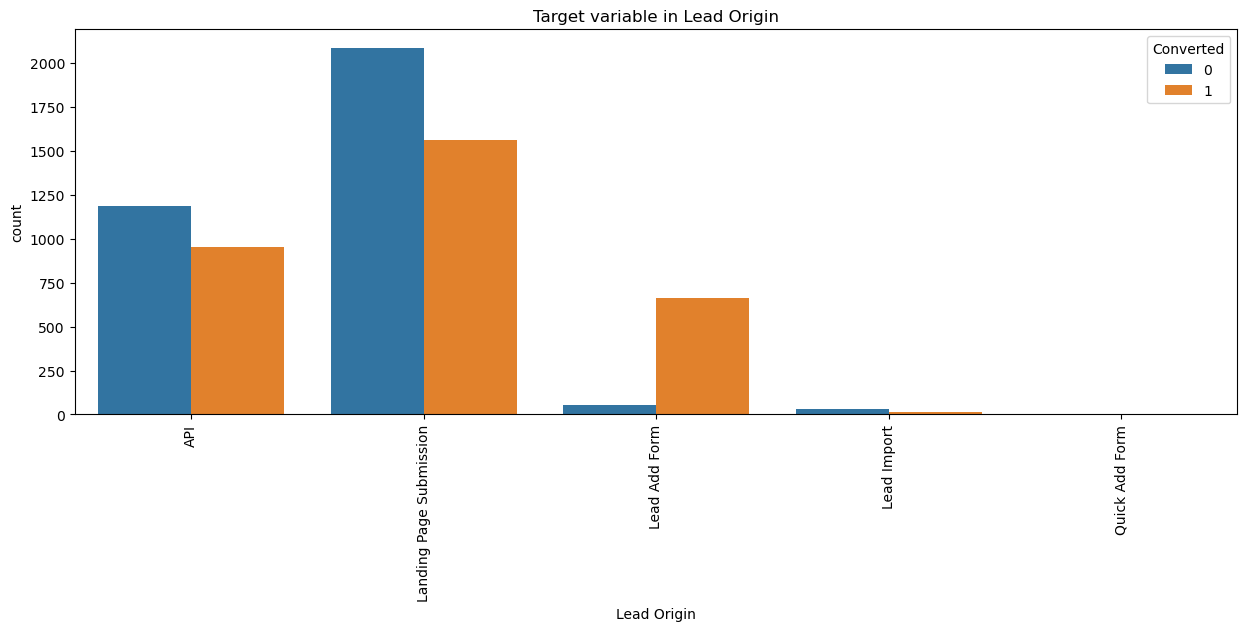

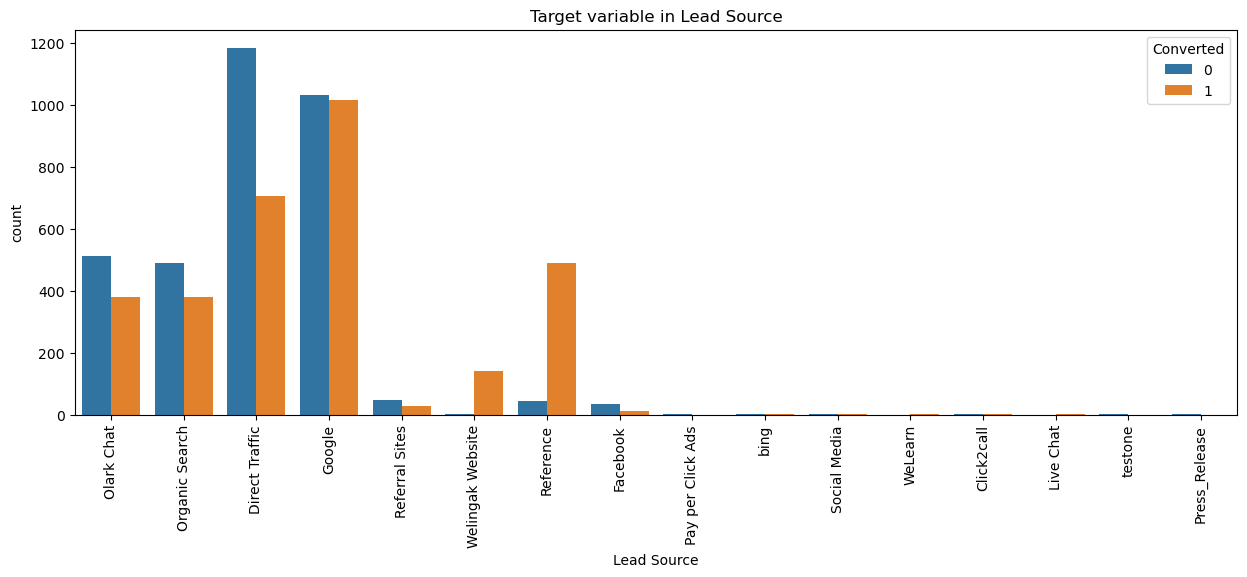

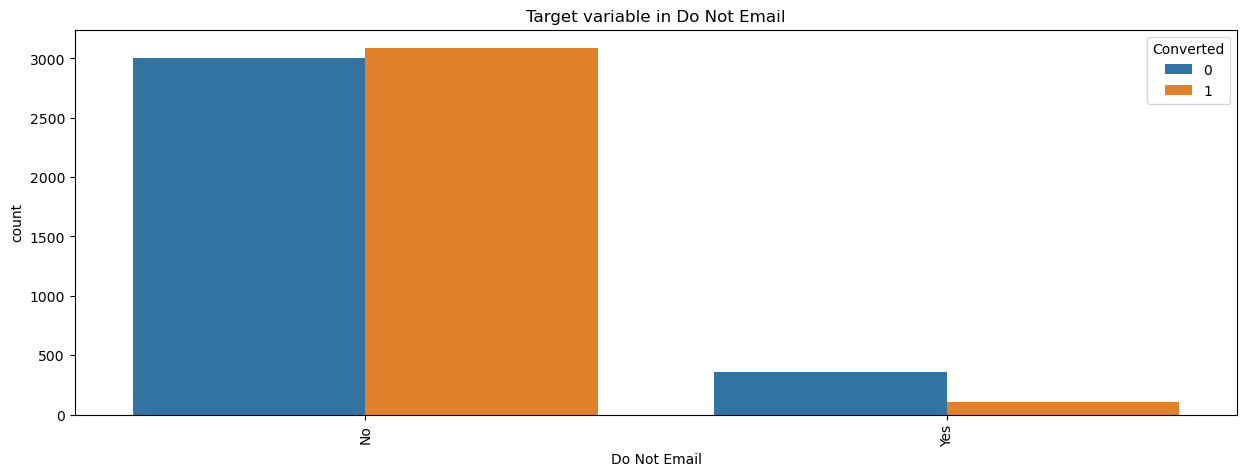

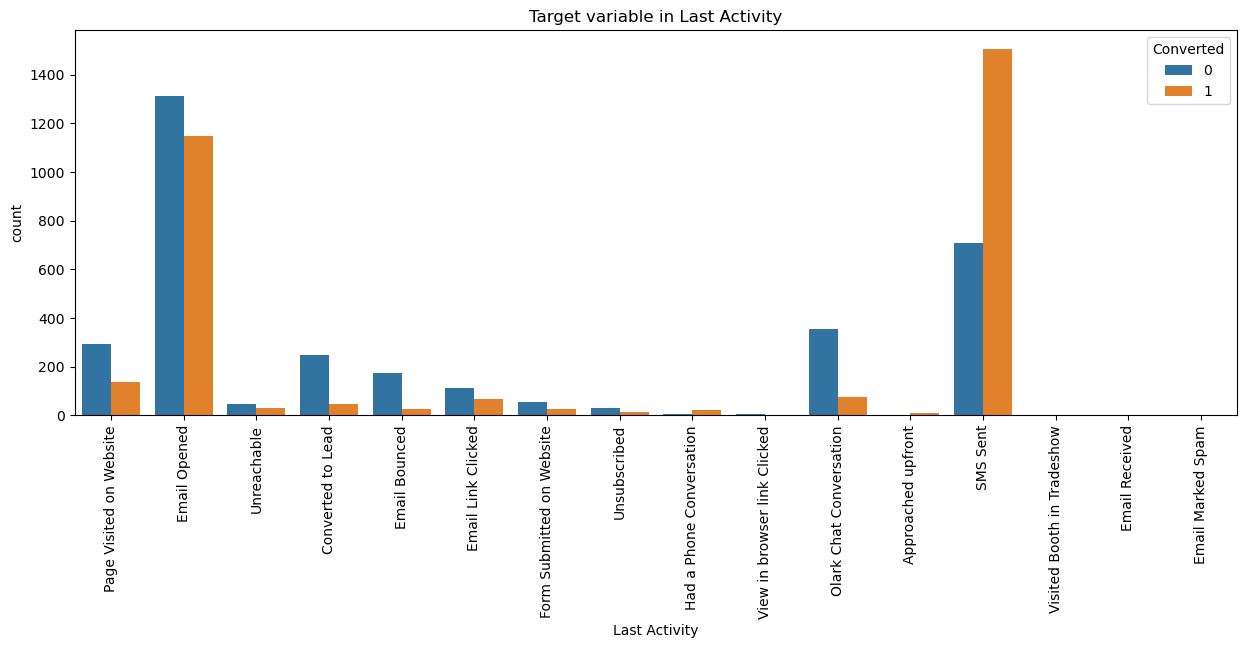

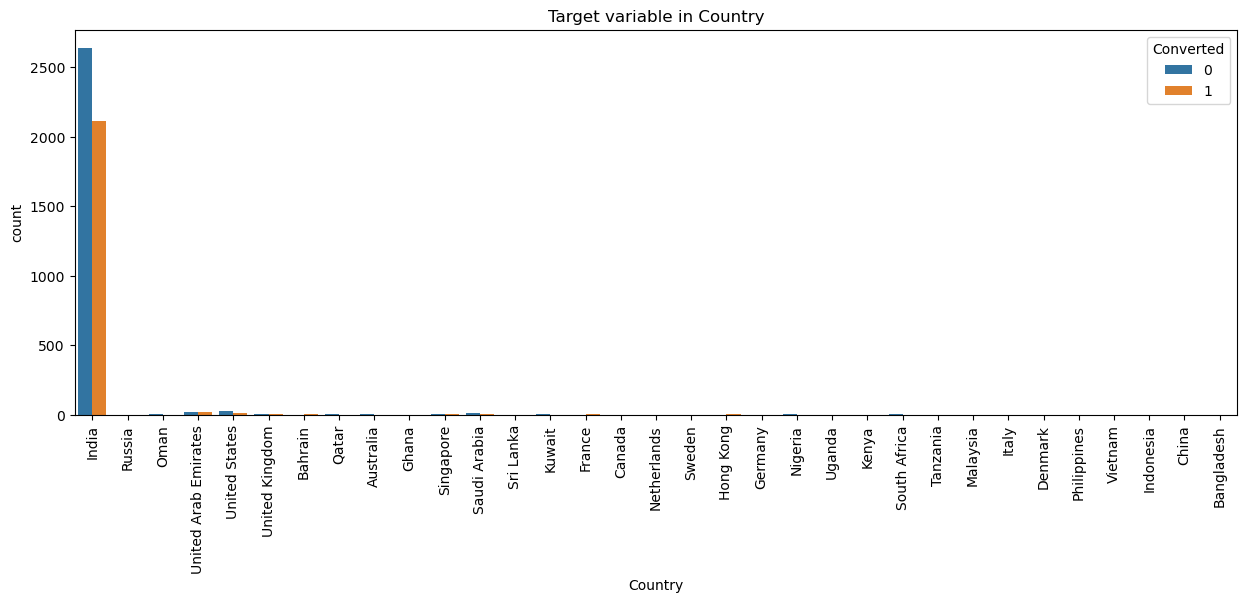

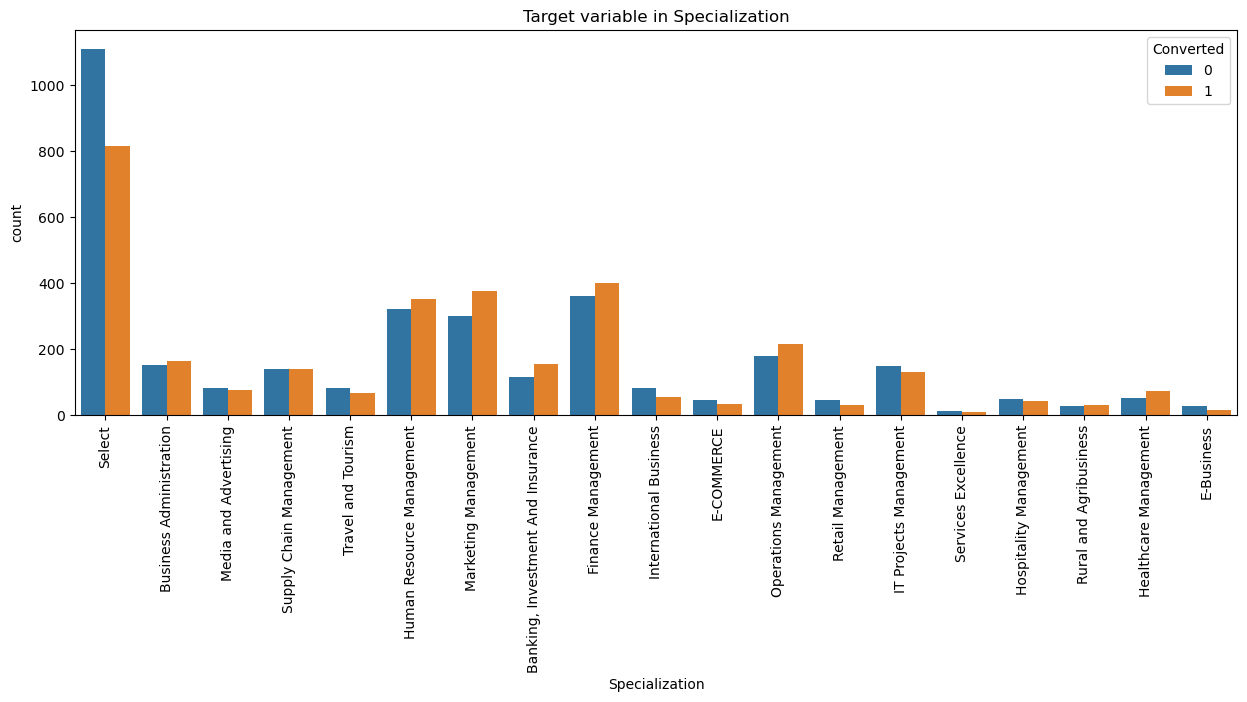

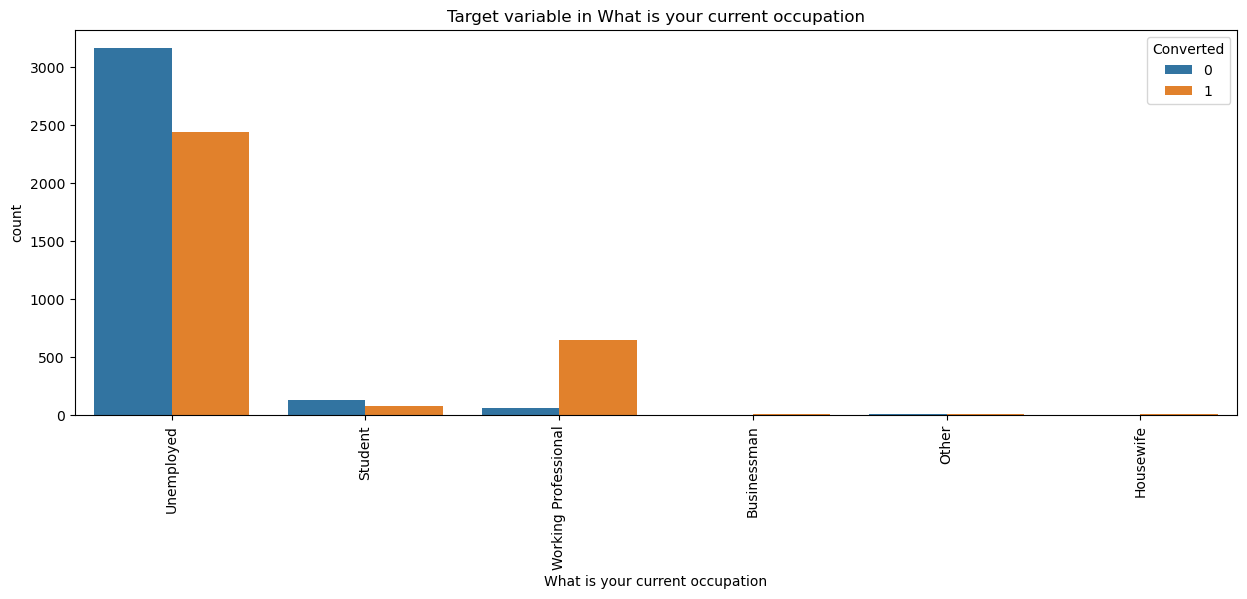

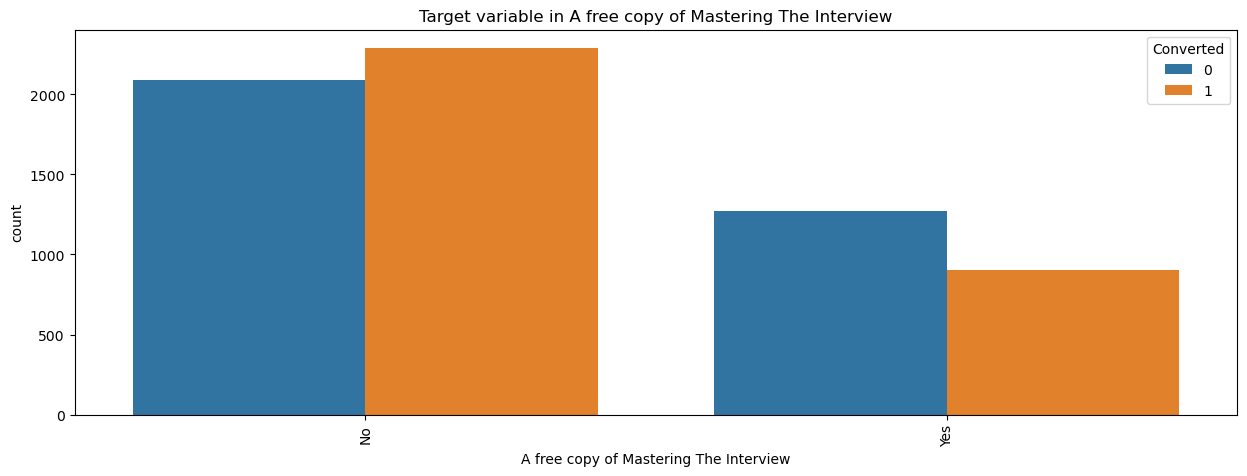

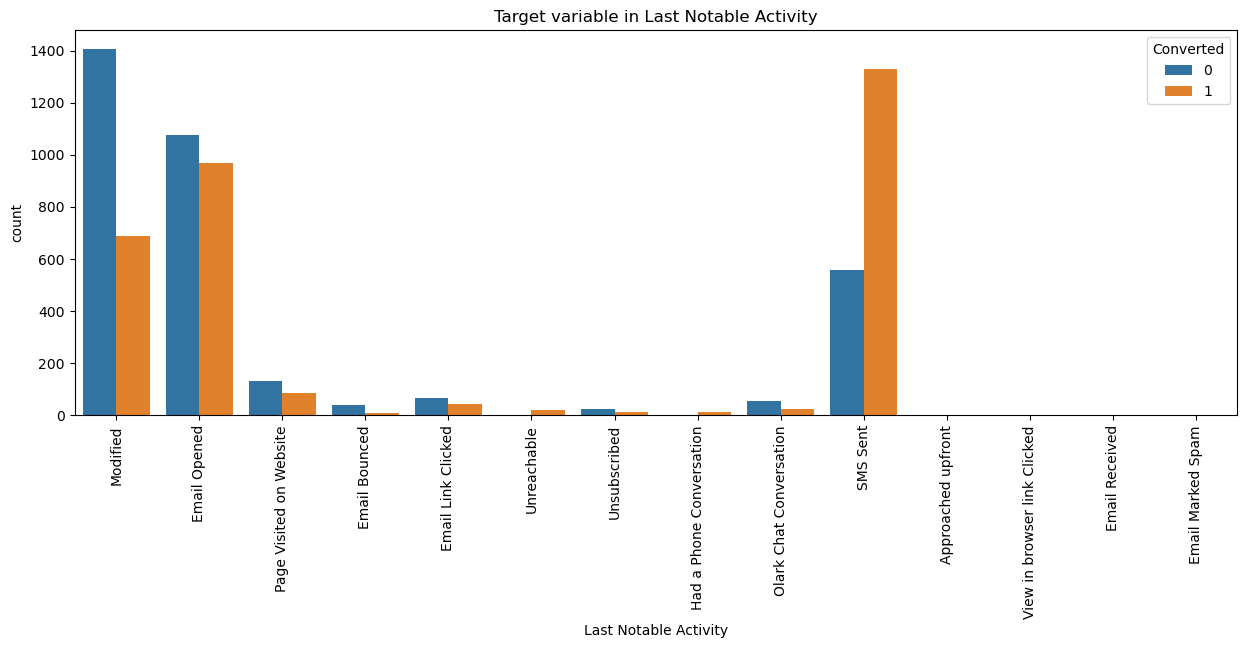

In [33]:
conv = Lead.select_dtypes(include="object").columns
for i in conv:
    plt.figure(figsize=(15, 5))
    
    # Add x parameter to countplot
    sns.countplot(x=Lead[i], hue=Lead.Converted)
    
    plt.xticks(rotation=90)
    plt.title('Target variable in ' + i)
    plt.xlabel(i)
    plt.show()


In [34]:
# Checking the number of null values again
Lead.isnull().sum().sort_values(ascending=False)

Country                                   1605
TotalVisits                                130
Page Views Per Visit                       130
Last Activity                              103
Lead Source                                 36
Specialization                              18
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [35]:
# Dropping the null values rows in the column 'TotalVisits'

Lead = Lead[~pd.isnull(Lead['TotalVisits'])]

In [36]:
# Checking the number of null values again
Lead.isnull().sum().sort_values(ascending=False)

Country                                   1475
Lead Source                                 29
Specialization                              18
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [37]:
# Dropping the null values rows in the column 'Lead Source'

Lead = Lead[~pd.isnull(Lead['Lead Source'])]

In [38]:
# Checking the number of null values again
Lead.isnull().sum().sort_values(ascending=False)

Country                                   1447
Specialization                              18
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [39]:
# Drop the null values rows in the column 'Specialization'

Lead = Lead[~pd.isnull(Lead['Specialization'])]

In [40]:
# Checking the number of null values again
Lead.isnull().sum().sort_values(ascending=False)

Country                                   1447
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                               0
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [41]:
print(len(Lead.index))
print(len(Lead.index)/9240)

6373
0.6897186147186147


### We still have around 68% of the rows which seems good enough.

In [42]:
# Let's look at the dataset again

Lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Unemployed,No,Modified


In [43]:
# Dropping the "Prospect ID" and "Lead Number" 
Lead.drop(['Prospect ID', 'Lead Number'],axis= 1, inplace = True)

In [44]:
Lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Unemployed,No,Modified


# Dummy variable creation
The next step is to dealing with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [45]:
# Checking the columns which are of type 'object'

temp = Lead.loc[:, Lead.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
# Demo Cell
df = pd.DataFrame({'P': ['p', 'q', 'p']})
df

,P
0,p
1,q
2,p


In [47]:
pd.get_dummies(df).astype(int)

,P_p,P_q
0,1,0
1,0,1
2,1,0


In [48]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(Lead[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True, dtype=int)

# Add the results to the master dataframe
Lead = pd.concat([Lead, dummy], axis=1)

In [49]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' 
# which is useless so we
# drop that level by specifying it explicitly
dummy_spl = pd.get_dummies(Lead['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'],axis= 1)
Lead = pd.concat([Lead, dummy_spl], axis = 1)

In [50]:
# Drop the variables for which the dummy variables have been created
Lead = Lead.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1)

In [51]:
# Let's take a look at the dataset again
Lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,NaN,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,0,5.0,674,2.5,India,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,India,1,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,India,1,0,0,1,0,...,False,False,False,True,False,False,False,False,False,False
4,1,2.0,1428,1.0,India,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


# Test-Train Split
The next step is to spliting the dataset into training an testing sets.

In [52]:
# Importing the `train_test_split` library
from sklearn.model_selection import train_test_split

In [53]:
# Put all the feature variables in X

X = Lead.drop(['Converted'],axis= 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,NaN,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,5.0,674,2.5,India,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,India,1,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,India,1,0,0,1,0,0,...,False,False,False,True,False,False,False,False,False,False
4,2.0,1428,1.0,India,1,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False


In [54]:
y = Lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [55]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [56]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4461, 75)
y_train Size (4461,)


# Scaling
Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [57]:
# Importing the 'MinMax scaler' Library
from sklearn.preprocessing import MinMaxScaler

In [58]:
# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,India,1,0,0,1,0,0,...,True,False,False,False,False,False,False,False,False,False
218,0.015936,0.082306,0.250,India,1,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
4171,0.023904,0.034331,0.375,India,1,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,True
4037,0.000000,0.000000,0.000,NaN,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3660,0.000000,0.000000,0.000,NaN,0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


#  Model Building
Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [59]:
# Importing the 'LogisticRegression' and creating a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [60]:
from sklearn.feature_selection import RFE
X_train = pd.get_dummies(X_train, drop_first=True)
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [61]:
# Check selected features
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable', 'Country_France'],
      dtype='object')


In [62]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 57),
 ('Lead Source_Direct Traffic', False, 29),
 ('Lead Source_Facebook', False, 55),
 ('Lead Source_Google', False, 59),
 ('Lead Source_Live Chat', False, 62),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 58),
 ('Lead Source_Pay per Click Ads', False, 56),
 ('Lead Source_Press_Release', False, 79),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 60),
 ('Lead Source_Social Media', False, 83),
 ('Lead Source_WeLearn', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 45),
 ('Lead Source_testone', False, 54),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 8),
 ('Last Activity_Email Link 

In [63]:
# Putting all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [64]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [65]:
# Importing 'statsmodels'
import statsmodels.api as sm

# Model Building-1

In [66]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
print(X_train[col].dtypes)

TotalVisits                                             float64
Total Time Spent on Website                             float64
Lead Origin_Lead Add Form                                 int32
Lead Source_Olark Chat                                    int32
Lead Source_Reference                                     int32
Lead Source_Welingak Website                              int32
Do Not Email_Yes                                          int32
Last Activity_Had a Phone Conversation                    int32
Last Activity_SMS Sent                                    int32
What is your current occupation_Student                   int32
What is your current occupation_Unemployed                int32
What is your current occupation_Working Professional      int32
Last Notable Activity_Had a Phone Conversation            int32
Last Notable Activity_Unreachable                         int32
Country_France                                             bool
dtype: object


In [67]:
import statsmodels.api as sm
X_train[col] = X_train[col].astype(int)
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_train_sm = sm.add_constant(X_train_encoded)

# Fit the GLM model
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()

# Display the summary of the model
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2440.4
Date:                Tue, 17 Sep 2024   Deviance:                       4880.7
Time:                        21:03:13   Pearson chi2:                 4.87e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2524
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [68]:
# Make a VIF dataframe for all the variables present
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.13
4,Lead Source_Reference,65.13
5,Lead Source_Welingak Website,20.01
7,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
10,What is your current occupation_Unemployed,1.74
8,Last Activity_SMS Sent,1.58
11,What is your current occupation_Working Profes...,1.22
3,Lead Source_Olark Chat,1.19
6,Do Not Email_Yes,1.08


In [69]:
# Let's first drop the variable `Lead Source_Reference` since it has a high p-value as well as a high VIF.
X_train.drop('TotalVisits', axis = 1, inplace = True)

In [70]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2441.5
Date:                Tue, 17 Sep 2024   Deviance:                       4883.1
Time:                        21:03:14   Pearson chi2:                 4.87e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2520
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2742      0.518      2.459      0.014       0.259       2.290
Total Time Spent on Website                            -22.9619   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Add Form                                1.7916      1.142      1.568      0.117      -0.447       4.031
Lead Source_Olark Chat                                   0.0849      0.096      0.888      0.374      -0.102       0.272
Lead Source_Reference                                    1.0215      1.169      0.874      0.382      -1.270       3.313
Lead Source_Welingak Website                             3.0996      1.523      2.035      0.042       0.115       6.085
Do Not Email_Yes                                        -1.5477      0.176     -8.811      0.000      -1.892      -1.203
Last Activity_Had a Phone Conversation                   1.2774      0.892      1.431      0.152      -0.472       3.026
Last Activity_SMS Sent                                   1.2009      0.074     16.206      0.000       1.056       1.346
What is your current occupation_Student                 -1.9060      0.553     -3.447      0.001      -2.990      -0.822
What is your current occupation_Unemployed              -2.0792      0.520     -3.998      0.000      -3.098      -1.060
What is your current occupation_Working Professional     0.6296      0.550      1.144      0.253      -0.449       1.708
Last Notable Activity_Had a Phone Conversation          21.9069   1.46e+04      0.001      0.999   -2.87e+04    2.87e+04
Last Notable Activity_Unreachable                        2.3507      0.777      3.026      0.002       0.828       3.873
Country_France                                           1.7231      1.180      1.461      0.144      -0.589       4.035
========================================================================================================================
"""

# Model 2

In [71]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2441.5
Date:                Tue, 17 Sep 2024   Deviance:                       4883.1
Time:                        21:03:14   Pearson chi2:                 4.87e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2520
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2742      0.518      2.459      0.014       0.259       2.290
Total Time Spent on Website                            -22.9619   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Add Form                                1.7916      1.142      1.568      0.117      -0.447       4.031
Lead Source_Olark Chat                                   0.0849      0.096      0.888      0.374      -0.102       0.272
Lead Source_Reference                                    1.0215      1.169      0.874      0.382      -1.270       3.313
Lead Source_Welingak Website                             3.0996      1.523      2.035      0.042       0.115       6.085
Do Not Email_Yes                                        -1.5477      0.176     -8.811      0.000      -1.892      -1.203
Last Activity_Had a Phone Conversation                   1.2774      0.892      1.431      0.152      -0.472       3.026
Last Activity_SMS Sent                                   1.2009      0.074     16.206      0.000       1.056       1.346
What is your current occupation_Student                 -1.9060      0.553     -3.447      0.001      -2.990      -0.822
What is your current occupation_Unemployed              -2.0792      0.520     -3.998      0.000      -3.098      -1.060
What is your current occupation_Working Professional     0.6296      0.550      1.144      0.253      -0.449       1.708
Last Notable Activity_Had a Phone Conversation          21.9069   1.46e+04      0.001      0.999   -2.87e+04    2.87e+04
Last Notable Activity_Unreachable                        2.3507      0.777      3.026      0.002       0.828       3.873
Country_France                                           1.7231      1.180      1.461      0.144      -0.589       4.035
========================================================================================================================
"""

# Checking VIF

In [72]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features    VIF
1                           Lead Origin_Lead Add Form  84.13
3                               Lead Source_Reference  65.13
4                        Lead Source_Welingak Website  20.01
6              Last Activity_Had a Phone Conversation   2.44
11     Last Notable Activity_Had a Phone Conversation   2.43
9          What is your current occupation_Unemployed   1.74
7                              Last Activity_SMS Sent   1.58
10  What is your current occupation_Working Profes...   1.22
2                              Lead Source_Olark Chat   1.19
5                                    Do Not Email_Yes   1.08
8             What is your current occupation_Student   1.03
12                  Last Notable Activity_Unreachable   1.01
0                         Total Time Spent on Website   1.00
13                                     Country_France   1.00


In [73]:
X_train.drop('Total Time Spent on Website', axis = 1, inplace = True)

In [74]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2442.4
Date:                Tue, 17 Sep 2024   Deviance:                       4884.9
Time:                        21:03:14   Pearson chi2:                 4.87e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2517
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2741      0.518      2.459      0.014       0.258       2.290
Lead Origin_Lead Add Form                                1.7922      1.142      1.569      0.117      -0.447       4.031
Lead Source_Olark Chat                                   0.0857      0.096      0.897      0.370      -0.102       0.273
Lead Source_Reference                                    1.0217      1.169      0.874      0.382      -1.269       3.313
Lead Source_Welingak Website                             3.1000      1.523      2.036      0.042       0.115       6.085
Do Not Email_Yes                                        -1.5466      0.176     -8.806      0.000      -1.891      -1.202
Last Activity_Had a Phone Conversation                   1.2776      0.892      1.432      0.152      -0.471       3.027
Last Activity_SMS Sent                                   1.1987      0.074     16.184      0.000       1.054       1.344
What is your current occupation_Student                 -1.9058      0.553     -3.446      0.001      -2.990      -0.822
What is your current occupation_Unemployed              -2.0793      0.520     -3.998      0.000      -3.099      -1.060
What is your current occupation_Working Professional     0.6301      0.550      1.145      0.252      -0.448       1.709
Last Notable Activity_Had a Phone Conversation          21.9067   1.46e+04      0.001      0.999   -2.87e+04    2.87e+04
Last Notable Activity_Unreachable                        2.3508      0.777      3.027      0.002       0.828       3.873
Country_France                                           1.7238      1.180      1.461      0.144      -0.588       4.036
========================================================================================================================
"""

In [75]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [76]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2443.0
Date:                Tue, 17 Sep 2024   Deviance:                       4886.1
Time:                        21:03:14   Pearson chi2:                 4.83e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2515
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.8431      0.175     10.519      0.000       1.500       2.187
Lead Origin_Lead Add Form                          1.7924      1.142      1.569      0.117      -0.447       4.032
Lead Source_Olark Chat                             0.0868      0.096      0.908      0.364      -0.101       0.274
Lead Source_Reference                              1.0227      1.169      0.875      0.382      -1.268       3.314
Lead Source_Welingak Website                       3.0998      1.523      2.035      0.042       0.115       6.085
Do Not Email_Yes                                  -1.5460      0.175     -8.810      0.000      -1.890      -1.202
Last Activity_Had a Phone Conversation             1.2824      0.891      1.439      0.150      -0.464       3.029
Last Activity_SMS Sent                             1.2012      0.074     16.235      0.000       1.056       1.346
What is your current occupation_Student           -2.4756      0.259     -9.548      0.000      -2.984      -1.967
What is your current occupation_Unemployed        -2.6494      0.178    -14.922      0.000      -2.997      -2.301
Last Notable Activity_Had a Phone Conversation    21.9032   1.46e+04      0.001      0.999   -2.87e+04    2.87e+04
Last Notable Activity_Unreachable                  2.3461      0.777      3.018      0.003       0.823       3.870
Country_France                                     1.7235      1.180      1.461      0.144      -0.589       4.036
==================================================================================================================
"""

In [77]:
# Making a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Origin_Lead Add Form,84.13
2,Lead Source_Reference,65.05
3,Lead Source_Welingak Website,20.01
5,Last Activity_Had a Phone Conversation,2.43
9,Last Notable Activity_Had a Phone Conversation,2.43
8,What is your current occupation_Unemployed,1.65
6,Last Activity_SMS Sent,1.44
1,Lead Source_Olark Chat,1.18
4,Do Not Email_Yes,1.08
7,What is your current occupation_Student,1.02


In [78]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [79]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2445.4
Date:                Tue, 17 Sep 2024   Deviance:                       4890.7
Time:                        21:03:14   Pearson chi2:                 4.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2507
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.8415      0.175     10.509      0.000       1.498       2.185
Lead Origin_Lead Add Form                      1.7922      1.142      1.569      0.117      -0.447       4.031
Lead Source_Olark Chat                         0.0879      0.095      0.921      0.357      -0.099       0.275
Lead Source_Reference                          1.0231      1.169      0.875      0.381      -1.268       3.314
Lead Source_Welingak Website                   3.1000      1.523      2.036      0.042       0.115       6.085
Do Not Email_Yes                              -1.5459      0.175     -8.810      0.000      -1.890      -1.202
Last Activity_Had a Phone Conversation         2.6123      0.763      3.424      0.001       1.117       4.108
Last Activity_SMS Sent                         1.2012      0.074     16.235      0.000       1.056       1.346
What is your current occupation_Student       -2.4743      0.259     -9.543      0.000      -2.982      -1.966
What is your current occupation_Unemployed    -2.6479      0.178    -14.912      0.000      -2.996      -2.300
Last Notable Activity_Unreachable              2.3462      0.777      3.018      0.003       0.823       3.870
Country_France                                 1.7237      1.180      1.461      0.144      -0.588       4.036
==============================================================================================================
"""

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Origin_Lead Add Form,84.13
2,Lead Source_Reference,65.05
3,Lead Source_Welingak Website,20.01
8,What is your current occupation_Unemployed,1.65
6,Last Activity_SMS Sent,1.44
1,Lead Source_Olark Chat,1.18
4,Do Not Email_Yes,1.08
7,What is your current occupation_Student,1.02
5,Last Activity_Had a Phone Conversation,1.00
9,Last Notable Activity_Unreachable,1.00


In [81]:
X_reduced = X.drop(['Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Reference',], axis=1, errors='ignore')


In [82]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2445.4
Date:                Tue, 17 Sep 2024   Deviance:                       4890.7
Time:                        21:03:14   Pearson chi2:                 4.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2507
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.8415      0.175     10.509      0.000       1.498       2.185
Lead Origin_Lead Add Form                      1.7922      1.142      1.569      0.117      -0.447       4.031
Lead Source_Olark Chat                         0.0879      0.095      0.921      0.357      -0.099       0.275
Lead Source_Reference                          1.0231      1.169      0.875      0.381      -1.268       3.314
Lead Source_Welingak Website                   3.1000      1.523      2.036      0.042       0.115       6.085
Do Not Email_Yes                              -1.5459      0.175     -8.810      0.000      -1.890      -1.202
Last Activity_Had a Phone Conversation         2.6123      0.763      3.424      0.001       1.117       4.108
Last Activity_SMS Sent                         1.2012      0.074     16.235      0.000       1.056       1.346
What is your current occupation_Student       -2.4743      0.259     -9.543      0.000      -2.982      -1.966
What is your current occupation_Unemployed    -2.6479      0.178    -14.912      0.000      -2.996      -2.300
Last Notable Activity_Unreachable              2.3462      0.777      3.018      0.003       0.823       3.870
Country_France                                 1.7237      1.180      1.461      0.144      -0.588       4.036
==============================================================================================================
"""

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Origin_Lead Add Form,84.13
2,Lead Source_Reference,65.05
3,Lead Source_Welingak Website,20.01
8,What is your current occupation_Unemployed,1.65
6,Last Activity_SMS Sent,1.44
1,Lead Source_Olark Chat,1.18
4,Do Not Email_Yes,1.08
7,What is your current occupation_Student,1.02
5,Last Activity_Had a Phone Conversation,1.00
9,Last Notable Activity_Unreachable,1.00


This model is good to go..

In [84]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.597446
218     0.308658
4171    0.308658
4037    0.327730
3660    0.961214
207     0.308658
2044    0.308658
6411    0.863127
6498    0.101681
2085    0.983469
dtype: float64

In [85]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.59744582, 0.30865753, 0.30865753, 0.32772959, 0.96121354,
       0.30865753, 0.30865753, 0.86312728, 0.10168053, 0.98346929])

# Creating a dataframe with the actual conversion flag and the predicted probabilities

In [86]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.597446
1,0,0.308658
2,1,0.308658
3,1,0.327730
4,1,0.961214


# Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [87]:
print(y_train_pred_final.columns)
y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

Index(['Converted', 'Conversion_Prob'], dtype='object')


,Converted,Conversion_Prob,Predicted
0,0,0.597446,1
1,0,0.308658,0
2,1,0.308658,0
3,1,0.327730,0
4,1,0.961214,1


In [88]:
# Create confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1835  477]
 [ 762 1387]]


In [89]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7222595830531271


In [90]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [91]:
# Calculating the 'sensitivity'

TP/(TP+FN)

0.6454164727780363

In [92]:
# Calculating the 'specificity'

TN/(TN+FP)

0.7936851211072664

In [93]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [94]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

In [95]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

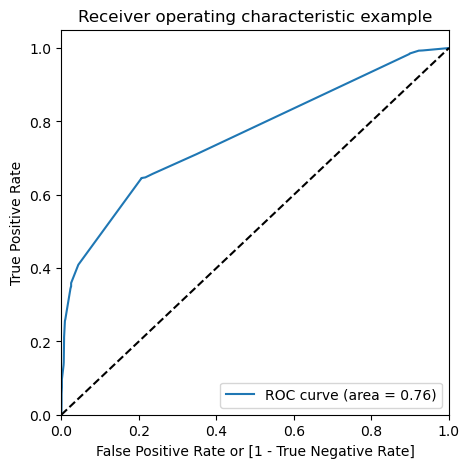

In [96]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [97]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.597446,1,1,1,1,1,1,1,0,0,0,0
1,0,0.308658,0,1,1,1,1,0,0,0,0,0,0
2,1,0.308658,0,1,1,1,1,0,0,0,0,0,0
3,1,0.327730,0,1,1,1,1,0,0,0,0,0,0
4,1,0.961214,1,1,1,1,1,1,1,1,1,1,1


In [98]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.517373  0.993020  0.075260
0.2   0.2  0.518494  0.993020  0.077422
0.3   0.3  0.526788  0.983713  0.102076
0.4   0.4  0.722260  0.645416  0.793685
0.5   0.5  0.722260  0.645416  0.793685
0.6   0.6  0.692670  0.409027  0.956315
0.7   0.7  0.673616  0.349465  0.974913
0.8   0.8  0.673392  0.348069  0.975779
0.9   0.9  0.613988  0.206142  0.993080


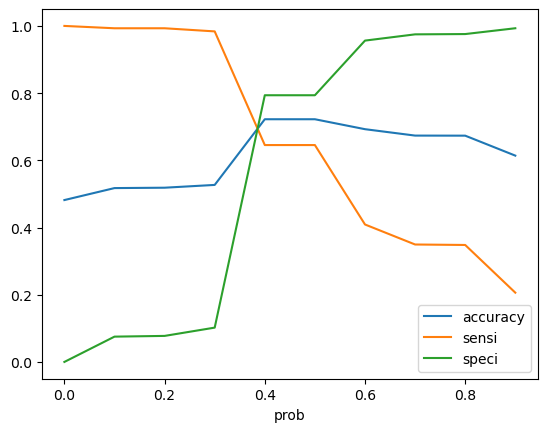

In [99]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [100]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.597446,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.308658,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.308658,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.327730,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.961214,1,1,1,1,1,1,1,1,1,1,1,1


In [101]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7222595830531271

In [102]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1835,  477],
       [ 762, 1387]], dtype=int64)

In [103]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [104]:
# Calculating the 'Sensitivity'

TP/(TP+FN)

0.6454164727780363

In [105]:
# Calculating the 'Specificity'

TN/(TN+FP)

0.7936851211072664

# Step 4: Making Predictions on the Test Set
Let's now make predicitons on the test set

In [106]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [111]:
# Substituting all the columns in the final train model
col = X_train.columns

In [117]:
# Assume col is the list of columns used in the model
# Drop 'Country_France' column if it exists in X_test
# Drop 'Country_France' column if it exists
X_test = X_test.drop(columns=['Country_France'], errors='ignore')

# Ensure X_test has all the columns used in the model
X_test = X_test.reindex(columns=col, fill_value=0)  # Fill missing columns with default values if needed


In [118]:
X_test = X_test[col]

In [119]:
# Add constant column to X_test
X_test_sm = sm.add_constant(X_test)

In [120]:
X_test_sm

,const,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable,Country_France
4771,1.0,1,0,1,0,0,0,1,0,0,0,0
6122,1.0,0,0,0,0,0,0,0,0,1,0,0
9202,1.0,0,0,0,0,0,0,1,0,1,0,0
6570,1.0,0,0,0,0,1,0,1,0,1,0,0
2668,1.0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0,0,0,0,0,0,1,0,1,0,0
6583,1.0,0,0,0,0,0,0,1,0,1,0,0
5531,1.0,0,0,0,0,0,0,0,0,1,0,0
3056,1.0,0,0,0,0,1,0,1,0,1,0,0


In [121]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.997151
1,0,0.308658
2,0,0.597446
3,1,0.240296
4,1,0.597446


In [122]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.997151,1
1,0,0.308658,0
2,0,0.597446,1
3,1,0.240296,0
4,1,0.597446,1
...,...,...,...
1907,0,0.597446,1
1908,1,0.597446,1
1909,0,0.308658,0
1910,1,0.240296,0


In [123]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7107740585774058

In [124]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2


array([[758, 238],
       [315, 601]], dtype=int64)

In [125]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [126]:
# Calculating the sensitivity
TP/(TP+FN)

0.6561135371179039

In [127]:
# Calculating the specificity
TN/(TN+FP)

0.7610441767068273

# Precision-Recall

In [128]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1835,  477],
       [ 762, 1387]], dtype=int64)

In [129]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.744098712446352

In [130]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6454164727780363

In [131]:
from sklearn.metrics import precision_recall_curve

In [132]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

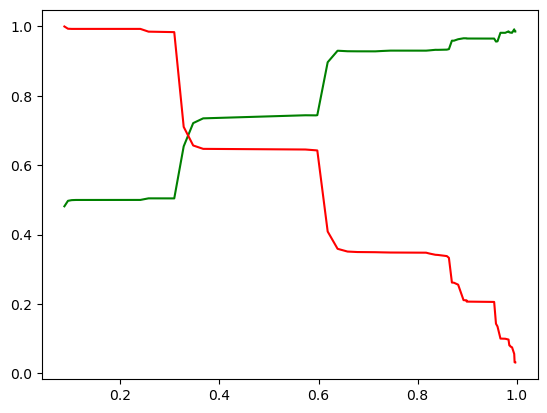

In [133]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [134]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.597446,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.308658,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.308658,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.327730,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.961214,1,1,1,1,1,1,1,1,1,1,1,1


In [135]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7222595830531271

In [136]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1835,  477],
       [ 762, 1387]], dtype=int64)

In [137]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [138]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.744098712446352

In [139]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.6454164727780363

# Prediction on Test set

In [140]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.997151
1,0,0.308658
2,0,0.597446
3,1,0.240296
4,1,0.597446


In [141]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.997151,1
1,0,0.308658,0
2,0,0.597446,1
3,1,0.240296,0
4,1,0.597446,1
...,...,...,...
1907,0,0.597446,1
1908,1,0.597446,1
1909,0,0.308658,0
1910,1,0.240296,0


In [142]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7191422594142259

In [143]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[775, 221],
       [316, 600]], dtype=int64)

In [144]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [145]:
# Precision = TP / TP + FP
TP / (TP + FP)


0.730816077953715

In [146]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.6550218340611353

# Conclusion